In [13]:
# from Marcel's report

import collections
import json
import matplotlib.pyplot as plt
from   matplotlib.pyplot import figure
import numpy as np
import os
import pandas as pd
import re
import requests
import sys

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [21]:
def load_speeches(period,comments):

    if comments:
        filename = f'../../data/speeches_{period}_with_comments.jsonl'
    else:
        filename = f'../../data/speeches_{period}.jsonl'

    with open(filename, 'r', encoding = 'utf8') as fp:
        data = list(fp)
    speeches = []
    for line in data:
        speeches.append(json.loads(line))

    return speeches

#from utilities.BTTools import load_speeches
speeches = load_speeches(20,True)
len(speeches)

4866

In [6]:
party_names = []
for speech in speeches:
    if speech['party'] in party_names:
        pass
    else:
        party_names.append(speech['party'])
        
print(party_names)

# Dictionary included 0
empty_list_per_party = []
for _ in range(len(party_names)):
    empty_list_per_party.append(0)
party_speech_count = {k: v for k, v in zip(party_names, empty_list_per_party)}

# Dictionary fill quantity for each party
#nSpeeches = np.zeros((nParties,1),dtype = np.uint16)
for speech in speeches:
    if speech['party'] in party_names:
        party_speech_count[speech['party']] = party_speech_count[speech['party']] + 1
    else:
        party_names.append(speech['party'])
        party_speech_count[speech['party']] = 1
        
print(party_speech_count)

['BÜNDNIS 90/DIE GRÜNEN', 'CDU/CSU', 'Fraktionslos', 'AfD', 'SPD', 'FDP', 'unknown', 'DIE LINKE']


{'BÜNDNIS 90/DIE GRÜNEN': 781,
 'CDU/CSU': 1076,
 'Fraktionslos': 26,
 'AfD': 641,
 'SPD': 1145,
 'FDP': 651,
 'unknown': 164,
 'DIE LINKE': 382}

In [26]:


def augment_with_comments(speeches):
    regex = "{(.*?)}" # hier steht die genaue Definition der Kommentare vom Parser
    comments = []
    modified_speeches = []
    for speech in speeches:
        text = speech['text']
        matches = re.findall(regex,text)
        speech['comments'] = matches
        modified_speeches.append(speech)
    return modified_speeches

speeches = augment_with_comments(speeches) # hier erfolgt der Funktionsaufruf


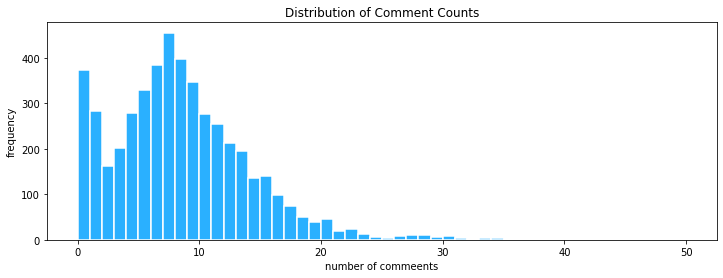

In [46]:
comment_count_per_speech = [ len(speeches[sx]['comments']) for sx in range(len(speeches)) ]
fig = plt.figure(figsize=(12,4))
plt.hist(comment_count_per_speech, bins=50, range=[0, 50], align='mid', facecolor = '#2ab0ff', edgecolor='#ffffff', linewidth=1.5)
plt.title("Distribution of Comment Counts")
plt.xlabel("number of comments")
plt.ylabel("frequency")
plt.show()

In [48]:
comments_per_party = []
for _ in range(len(party_names)):
    comments_per_party.append(['all comments per party'])
#comments_to = {k: v for k, v in zip(party_names, comments_per_party)}

comments_to = {}
count_comments = 0
for party in party_names:
    comments_to.update({ party : [] })
for speech in speeches:
    if len(speech['comments']) > 0:
        for comment in speech['comments']:
            for split_comment in comment.split(' – '):
                comments_to[speech['party']].append(split_comment)
                count_comments = count_comments+1
                
print(count_comments)  

39850
